In [1]:
!pip install gym-super-mario-bros

In [2]:
!pip install nes-py

render()在colab中会报错，其功能为弹出一个窗口，显示super Mario bros的画面！

In [5]:
from nes_py.wrappers import JoypadSpace #引入NES的包，Joypad是手柄的意思
import gym_super_mario_bros #引入超级马里奥的环境
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT #从超级马里奥的动作里面引入simple movement
import time #引入时间
from matplotlib import pyplot as plt # 导入绘图库

env = gym_super_mario_bros.make('SuperMarioBros-v0') #创建马里奥的环境
env = JoypadSpace(env, SIMPLE_MOVEMENT) #调用包装器，可以对比使用JoypadSpace和不使用有什么区别

# gym的标准执行代码
done = True # done有两种情况，一中是马里奥over了，另一种是win了
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample()) # 在action中随机取一种，然后得到state（游戏画面），reward，done和info(自定义奖励函数中比较有用，比如吃了多少硬币，走了多少步等等)
    # time.sleep(0.01)
    # env.render() # 渲染

env.close() # 关掉这么环境

In [17]:
env.action_space # 查看action_space中有多少action

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Discrete(7)

In [20]:
env.action_space.sample() #对action space中的space进行随机采样

4

In [21]:
SIMPLE_MOVEMENT # action对应马里奥游戏中是什么动作呢？

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [22]:
SIMPLE_MOVEMENT[3] # 查看随机采样到3对应的动作是什么

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['right', 'B']

观察使用简单的向右action，其实际马里奥是否向右走

In [3]:
from nes_py.wrappers import JoypadSpace #引入NES的包，Joypad是手柄的意思
import gym_super_mario_bros #引入超级马里奥的环境
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT #从超级马里奥的动作里面引入simple movement
import time #引入时间
from matplotlib import pyplot as plt # 导入绘图库

env = gym_super_mario_bros.make('SuperMarioBros-v0') #创建马里奥的环境
env = JoypadSpace(env, SIMPLE_MOVEMENT) #调用包装器，可以对比使用JoypadSpace和不使用有什么区别

# gym的标准执行代码
done = True # done有两种情况，一中是马里奥over了，另一种是win了
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(1) # 在action中随机取一种，然后得到state（游戏画面），reward，done和info(自定义奖励函数中比较有用，比如吃了多少硬币，走了多少步等等)
    # time.sleep(0.01)
    # env.render() # 渲染

# env.close() # 关掉这么环境

不使用JoypadSpace的情况

In [4]:
env = gym_super_mario_bros.make('SuperMarioBros-v0') #创建马里奥的环境

In [21]:
env.action_space #可以看到有256个离散的动作，学习7个值比学习256个值方便快捷的多

Discrete(256)

# 分析State

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]], dtype=uint8)
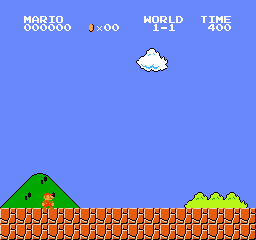

In [22]:
state = env.reset()
state

先让它走一定的步数，再把它打印出来

In [33]:
env = gym_super_mario_bros.make('SuperMarioBros-v0') #创建马里奥的环境
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [34]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

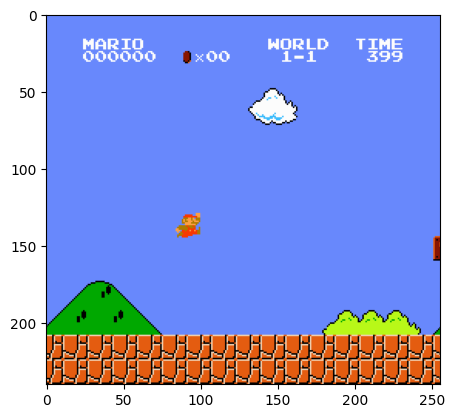

In [47]:
for i in range(10):
  state, reward, done, info = env.step(2)
plt.imshow(state)

In [48]:
env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#查看奖励

In [ ]:
env = gym_super_mario_bros.make('SuperMarioBros-v0') #创建马里奥的环境
env = JoypadSpace(env, SIMPLE_MOVEMENT) #调用包装器，可以对比使用JoypadSpace和不使用有什么区别

# gym的标准执行代码
done = True # done有两种情况，一中是马里奥over了，另一种是win了
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample()) # 在action中随机取一种，然后得到state（游戏画面），reward，done和info(自定义奖励函数中比较有用，比如吃了多少硬币，走了多少步等等)
    print(reward)

可以看到它如果在一个地方跳不过去，那么时间流逝的话，reward会有惩罚。

over的话reward是-15

奖励函数是一个对决策非常重要的一个参数（方向）

如果有新的需求，比如吃蘑菇，那么应该对奖励函数定义吃蘑菇的reward

#查看info

In [51]:
info

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'coins': 0,
 'flag_get': False,
 'life': 0,
 'score': 200,
 'stage': 1,
 'status': 'small',
 'time': 169,
 'world': 1,
 'x_pos': 722,
 'y_pos': 79}

In [53]:
env.close()

# 换关卡

In [55]:
env = gym_super_mario_bros.make('SuperMarioBros-4-2-v1') #创建马里奥的环境
env = JoypadSpace(env, SIMPLE_MOVEMENT) #调用包装器，可以对比使用JoypadSpace和不使用有什么区别

# gym的标准执行代码
done = True # done有两种情况，一中是马里奥over了，另一种是win了
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample()) # 在action中随机取一种，然后得到state（游戏画面），reward，done和info(自定义奖励函数中比较有用，比如吃了多少硬币，走了多少步等等)

env.close()

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-4-2-v1 is out of date. You should consider upgrading to version `v3`.
  logger.warn(


# Stable-Baseline3
一个基于Pytorch的强化学习一系列算法库

可以通过example来学习了解Stable-Baseline3

其中包含的算法有A2C、DDPG、DQN、HWR、PPO、SAC、TD3

In [12]:
!pip install gymnasium

In [13]:
!pip install stable_baselines3

In [6]:
import gymnasium as gym # 引入gym游戏库

from stable_baselines3 import PPO # 引入PPO算法
from stable_baselines3.common.env_util import make_vec_env # 引入矢量化的工具，也就是平行话的环境

# Parallel environments
vec_env = make_vec_env("CartPole-v1", n_envs=4) # 创建4个平行的环境一起跑

model = PPO("MlpPolicy", vec_env, verbose=1) # 建立PPO算法的模型
model.learn(total_timesteps=25000) # 训练过程
model.save("ppo_cartpole") # 保存模型

del model # remove to demonstrate saving and loading 删除模型

model = PPO.load("ppo_cartpole") # 加载模型

# 测试模型
obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    # vec_env.render("human")

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | 22.4     |
| time/              |          |
|    fps             | 4338     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 31.1        |
|    ep_rew_mean          | 31.1        |
| time/                   |             |
|    fps                  | 1666        |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014474406 |
|    clip_fraction        | 0.233       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.00097     |
|    learning

对于CartPole-v1这样的任务情况是不能跑到两边去，并且上面的杆摆动幅度补偿过15°

其返回的参数，主要关注两个，一个为ep_len_mean，另一个是ep_rew_mean。一个代表四个平均存活时间，另一个为平均reward。

# 没有训练的结果
与使用PPO算法进行对比

In [16]:
import gymnasium as gym # 引入gym游戏库
from matplotlib import pyplot as plt

env = gym.make("CartPole-v1")

# 测试模型
done = True
for step in range(5000):
  if done:
    state = env.reset()
  state, reward, done, dones, info = env.step(env.action_space.sample())
print(state)
env.close()

[ 0.00213574 -0.00840868  0.01926071  0.046072  ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 # 导入训练好的模型参数

In [ ]:
import gymnasium as gym # 引入gym游戏库

from stable_baselines3 import PPO # 引入PPO算法
from stable_baselines3.common.env_util import make_vec_env # 引入矢量化的工具，也就是平行话的环境

# Parallel environments
vec_env = make_vec_env("CartPole-v1", n_envs=4) # 创建4个平行的环境一起跑

model = PPO.load("ppo_cartpole") # 加载模型

# 测试模型
obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    # vec_env.render("human")

# 不用并行的环境

该代码有更新，现运行不了

In [ ]:
import gymnasium as gym # 引入gym游戏库

from stable_baselines3 import PPO # 引入PPO算法

# Parallel environments
env = gym.make("CartPole-v1") # 创建4个平行的环境一起跑

model = PPO("MlpPolicy", env, verbose=1) # 建立PPO算法的模型
model.learn(total_timesteps=2500) # 训练过程
model.save("ppo_cartpole1") # 保存模型

del model # remove to demonstrate saving and loading 删除模型

model = PPO.load("ppo_cartpole1") # 加载模型

# 测试模型
obs = env.reset()
done = True
while True:
    if done:
      state = env.reset()
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    # vec_env.render("human")

# 最最最最简单的马里奥训练过程

In [29]:
from nes_py.wrappers import JoypadSpace #引入NES的包，Joypad是手柄的意思
import gym_super_mario_bros #引入超级马里奥的环境
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT #从超级马里奥的动作里面引入simple movement
import time #引入时间
from matplotlib import pyplot as plt # 导入绘图库
import gymnasium as gym # 引入gym游戏库
from stable_baselines3 import PPO # 引入PPO算法
# from stable_baselines3.common.env_util import make_vec_env # 引入矢量化的工具，也就是平行话的环境

In [35]:
env = gym_super_mario_bros.make('SuperMarioBros-v0') #创建马里奥的环境
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [34]:
tensorboard_log = r'./tensorboard_log/'

model = PPO("CnnPolicy", env, verbose=1, tensorboard_log=tensorboard_log) # 建立PPO算法的模型
model.learn(total_timesteps=25000) # 训练过程
model.save("ppo_SuperMarioBros") # 保存模型

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


TypeError: JoypadSpace.reset() got an unexpected keyword argument 'seed'